# ***Mini Project 2 - Cheers (Group 4: Hilary & Qi Rui)***

#1. Import Libraries and Load Dataset to Google Colab



In [1]:
#Import libraries 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt    
import seaborn as sns 


from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import KFold 
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.naive_bayes import GaussianNB 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
!pip install kneed  
from kneed import KneeLocator 


sns.set()

In [2]:
#Reading first tab of Excel File to Google Colab
df_spend = pd.read_excel('/content/Trx Data v4.1.xlsx',sheet_name="Trx Data v4", header = 0)

In [3]:
#Checking first 5 rows of df_spend tab
df_spend.head()

,CardID,Date,Amount
0,C0100000199,20010820,229.00
1,C0100000199,20010628,139.00
2,C0100000199,20011229,229.00
3,C0100000343,20010727,49.00
4,C0100000343,20010202,169.99


In [4]:
#Reading the second tab of the Excel file into Google Colab
df_data = pd.read_excel('/content/Trx Data v4.1.xlsx',sheet_name="Data", header = 0)

In [5]:
#Checking first 5 rows of df_data tab
df_data.head()

,CardID,Gender,Age,Income
0,C0106349454,M,50,19990
1,C0102569919,M,43,19830
2,C0101511567,M,58,19827
3,C0102682721,M,49,19822
4,C0101171316,M,42,19818


In [6]:
# Using Outer Join to merge both df using the unique CardID column that's present in both worksheets. 
df = pd.merge(df_spend, df_data, on='CardID', how='outer')

In [7]:
# Check merged df head
df.head(10)

,CardID,Date,Amount,Gender,Age,Income
0,C0100000199,20010820,229.00,F,27,17177
1,C0100000199,20010628,139.00,F,27,17177
2,C0100000199,20011229,229.00,F,27,17177
3,C0100000343,20010727,49.00,F,28,4646
4,C0100000343,20010202,169.99,F,28,4646
5,C0100000343,20010712,299.00,F,28,4646
6,C0100000343,20010202,34.95,F,28,4646
7,C0100000343,20010907,99.00,F,28,4646
8,C0100000343,20010513,49.00,F,28,4646
9,C0100000375,20010922,99.99,F,31,3374


#2. EDA/ Data Cleaning

In [8]:
#Check shape of merged dataframe 
df.shape

(69215, 6)

In [9]:
#Check if there are any null values 
df.isnull().sum()

CardID      0
Date        0
 Amount     0
Gender      0
Age         0
Income      0
dtype: int64

In [10]:
#Describe df 
df.describe(include='all')

,CardID,Date,Amount,Gender,Age,Income
count,69215,6.921500e+04,69215.000000,69215,69215.000000,69215.000000
unique,12589,NaN,NaN,2,NaN,NaN
top,C0100891038,NaN,NaN,M,NaN,NaN
freq,30,NaN,NaN,37949,NaN,NaN
mean,NaN,2.001066e+07,77.966821,NaN,37.383486,11761.636336
std,NaN,3.435815e+02,127.528813,NaN,9.674122,5135.726752
min,NaN,2.001010e+07,1.490000,NaN,15.000000,1.000000
25%,NaN,2.001040e+07,6.990000,NaN,31.000000,7590.000000
50%,NaN,2.001063e+07,24.990000,NaN,37.000000,12315.000000
75%,NaN,2.001093e+07,99.000000,NaN,43.000000,16132.000000


In [11]:
#Check df types
df.dtypes

CardID       object
Date          int64
 Amount     float64
Gender       object
Age           int64
Income        int64
dtype: object

In [12]:
#Finding no. of unique Card IDs in 2001 
len(df['CardID'].unique())

12589

In [13]:
#Check df column names
df.columns

Index(['CardID', 'Date', ' Amount ', 'Gender', 'Age', 'Income'], dtype='object')

#3. RFM Model

Using the RFM model, which stands for Recency, Frequency and Monetary Value. We will be using another df for each unique card ID to show the respective AgeRange, IncomeRange, total annual spend and other columns if required.

Recency (R): Who have purchased recently? Number of days since last purchase (least recency)

Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)

Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

## (i) Data Wrangling

- Create columns and group the variables into bite-size for easy analysis

### a. Divide the Age into Groups

In [14]:
#Splitting age 
bins = [15, 20, 30, 40, 50, 60, 65]
labels = ['15-19', '20-29', '30-39', '40-49', '50-59', '60+'] 
df['AgeRange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

df.head()

,CardID,Date,Amount,Gender,Age,Income,AgeRange
0,C0100000199,20010820,229.00,F,27,17177,20-29
1,C0100000199,20010628,139.00,F,27,17177,20-29
2,C0100000199,20011229,229.00,F,27,17177,20-29
3,C0100000343,20010727,49.00,F,28,4646,20-29
4,C0100000343,20010202,169.99,F,28,4646,20-29


### b. Create Income Range for M (in RFM)

In [15]:
#Splitting income 
bins = [0, 1000, 4000, 7000, 10000, 20000]
labels = ['< 1000',	'1000-3999',	'4000-6999',	'7000-9999', '>9999'] 
df['IncomeRange'] = pd.cut(df.Income, bins, labels = labels,include_lowest = True)

df.head()

,CardID,Date,Amount,Gender,Age,Income,AgeRange,IncomeRange
0,C0100000199,20010820,229.00,F,27,17177,20-29,>9999
1,C0100000199,20010628,139.00,F,27,17177,20-29,>9999
2,C0100000199,20011229,229.00,F,27,17177,20-29,>9999
3,C0100000343,20010727,49.00,F,28,4646,20-29,4000-6999
4,C0100000343,20010202,169.99,F,28,4646,20-29,4000-6999


### c. Frequency of CardID appeared for F (in RFM) 

- to differentiate the loyalty of the cardholders, we will create a separate column to account for it


In [16]:
#Frequency of each card 
cardID_value = df['CardID'].value_counts()  
cardID_value 
cardID_value_1 = cardID_value.copy(deep=True)

In [17]:
#Checking the CardID.value type
cardID_value.dtypes

dtype('int64')

In [18]:
#Splitting CardID into 2 groups: High frequency, low frequency. 
#Where 0 represents the spend frequency of 1 to 15 occasions in a year and 1 represents the spend frequency of 16-30 occasions in a year. 

#Splitting CardID
bins = [1, 16, 31]
labels = ['0',	'1'] 
cardID_value = pd.cut(cardID_value, bins, labels = labels,include_lowest = True)

#Check CardID_value 
print(cardID_value)  

C0100891038    1
C0104671788    1
C0105242662    1
C0102207582    1
C0100730638    1
              ..
C0104379945    0
C0103505779    0
C0102643035    0
C0104874178    0
C0101889677    0
Name: CardID, Length: 12589, dtype: category
Categories (2, object): ['0' < '1']


In [19]:
#Adding CardID_value to df_data 
#Calling values to freq_enc
freq_enc = cardID_value.values 

#Adding column to df_data  
df_data['Freq_enc']  = freq_enc  

#Check df_data head 
df_data.head()

,CardID,Gender,Age,Income,Freq_enc
0,C0106349454,M,50,19990,1
1,C0102569919,M,43,19830,1
2,C0101511567,M,58,19827,1
3,C0102682721,M,49,19822,1
4,C0101171316,M,42,19818,1


In [20]:
#Group by CardID & Income 
cardID_size = df.groupby(["CardID", "Income"]).size()   

#Calling values to freq 
freq = cardID_size.values 

#Adding column to df_data  
df_data['Freq']  = freq  

#Check df_data head 
df_data.head()  

,CardID,Gender,Age,Income,Freq_enc,Freq
0,C0106349454,M,50,19990,1,3
1,C0102569919,M,43,19830,1,6
2,C0101511567,M,58,19827,1,4
3,C0102682721,M,49,19822,1,4
4,C0101171316,M,42,19818,1,2


In [21]:
#Sum up amount for spend 
amount_sum = df[['CardID',' Amount ']].groupby(['CardID']).sum()  
 
#calling values to amount_sum
spend = amount_sum.values

#Add amount_sum to df_data 
df_data['Spend']  = spend   

#Check df_data head 
df_data.head()

,CardID,Gender,Age,Income,Freq_enc,Freq,Spend
0,C0106349454,M,50,19990,1,3,597.00
1,C0102569919,M,43,19830,1,6,700.94
2,C0101511567,M,58,19827,1,4,223.98
3,C0102682721,M,49,19822,1,4,197.98
4,C0101171316,M,42,19818,1,2,428.00


### d. Result showing the recent purchase for respective CardID for R in (RFM)

In [22]:
#control column of 20011231 
df['MaxDate'] = 20011231  

#Check df head 
df.head()


,CardID,Date,Amount,Gender,Age,Income,AgeRange,IncomeRange,MaxDate
0,C0100000199,20010820,229.00,F,27,17177,20-29,>9999,20011231
1,C0100000199,20010628,139.00,F,27,17177,20-29,>9999,20011231
2,C0100000199,20011229,229.00,F,27,17177,20-29,>9999,20011231
3,C0100000343,20010727,49.00,F,28,4646,20-29,4000-6999,20011231
4,C0100000343,20010202,169.99,F,28,4646,20-29,4000-6999,20011231


In [23]:
#Check dtypes  
df.dtypes

CardID           object
Date              int64
 Amount         float64
Gender           object
Age               int64
Income            int64
AgeRange       category
IncomeRange    category
MaxDate           int64
dtype: object

In [24]:
#Convert Date/MaxDate to str 
df['Date'] = df['Date'].astype(str) 
df['MaxDate'] = df['MaxDate'].astype(str)  
df.dtypes 

#Convert to datetime 
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'], format='%Y%m%d') 
df['MaxDate']= pd.to_datetime(df['MaxDate'], format='%Y%m%d')  
df.dtypes

CardID                 object
Date           datetime64[ns]
 Amount               float64
Gender                 object
Age                     int64
Income                  int64
AgeRange             category
IncomeRange          category
MaxDate        datetime64[ns]
dtype: object

In [25]:
#Check df head 
df.head()

,CardID,Date,Amount,Gender,Age,Income,AgeRange,IncomeRange,MaxDate
0,C0100000199,2001-08-20,229.00,F,27,17177,20-29,>9999,2001-12-31
1,C0100000199,2001-06-28,139.00,F,27,17177,20-29,>9999,2001-12-31
2,C0100000199,2001-12-29,229.00,F,27,17177,20-29,>9999,2001-12-31
3,C0100000343,2001-07-27,49.00,F,28,4646,20-29,4000-6999,2001-12-31
4,C0100000343,2001-02-02,169.99,F,28,4646,20-29,4000-6999,2001-12-31


In [26]:
# calculate the recency
df['recency'] = df['MaxDate'] - df['Date']

df['recency'] = (df['recency'].dt.days)

#Groupby CardID & min value of recency 
dfc = df.groupby('CardID')['recency'] 

#Placing min data in df_data
df['min'] = dfc.transform('min')    

#Check df head 
df.head(20)  

#Forming a df 
df_10 = df[['CardID', 'min']] 

#Dropping duplicates 
df_10 = df_10.drop_duplicates(subset=['CardID'])  
df_10.head(25)   

#Reset index of df_10 
df_10 = df_10.reset_index(drop=True) 

#Checking df_10
df_10.head() 

,CardID,min
0,C0100000199,2
1,C0100000343,115
2,C0100000375,60
3,C0100000482,21
4,C0100000689,5


In [27]:
#Sorting df_data by CardID 
df_data = df_data.sort_values('CardID')

#Reset index 
df_data = df_data.reset_index(drop=True)  

#Merge df_data & df_10  
df_data = pd.merge(df_data, df_10, on='CardID', how='outer')  
df_data.head()


,CardID,Gender,Age,Income,Freq_enc,Freq,Spend,min
0,C0100000199,F,27,17177,0,2,338.00,2
1,C0100000343,F,28,4646,0,5,188.97,115
2,C0100000375,F,31,3374,0,4,408.97,60
3,C0100000482,M,26,19734,0,29,960.18,21
4,C0100000689,F,28,5717,0,2,278.00,5


In [28]:
#Retrieving the minimum values in the min column of df

min_values = df['min'].unique 
min_values

<bound method Series.unique of 0          2
1          2
2          2
3        115
4        115
        ... 
69210    113
69211    113
69212    113
69213    113
69214    113
Name: min, Length: 69215, dtype: int64>

In [29]:
#Checking df_data dtypes 
df_data.dtypes

CardID        object
Gender        object
Age            int64
Income         int64
Freq_enc    category
Freq           int64
Spend        float64
min            int64
dtype: object

In [30]:
#Finding corr 
corr = df_data.corr() 
corr

,Age,Income,Freq,Spend,min
Age,1.000000,0.403637,0.019831,0.017326,-0.192645
Income,0.403637,1.000000,0.011401,-0.002681,-0.179608
Freq,0.019831,0.011401,1.000000,0.480306,-0.002577
Spend,0.017326,-0.002681,0.480306,1.000000,0.017857
min,-0.192645,-0.179608,-0.002577,0.017857,1.000000


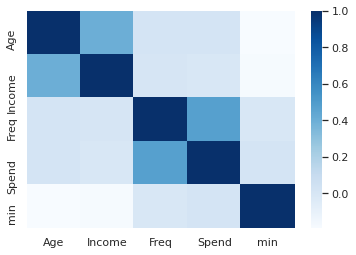

In [31]:
#Plot corr as heatmap 
sns.heatmap(corr, cmap="Blues")

Text(0.5, 1.0, 'Correlation Heatmap')

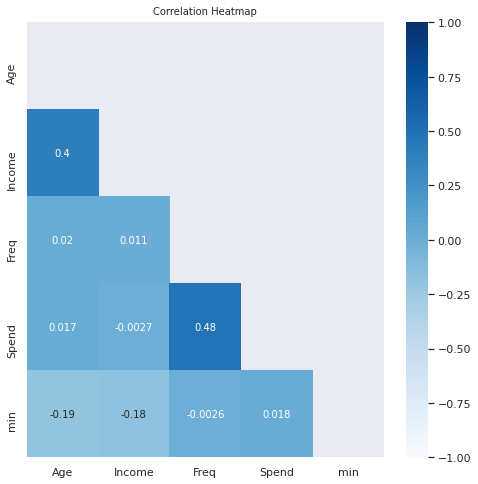

In [32]:
# triangle mask for heatmap to observe the correlation between every column and row 
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# heatmap with triangle mask
plt.subplots(figsize=(8, 8))
heatmap = sns.heatmap(corr, mask=mask, cmap='Blues', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=8)

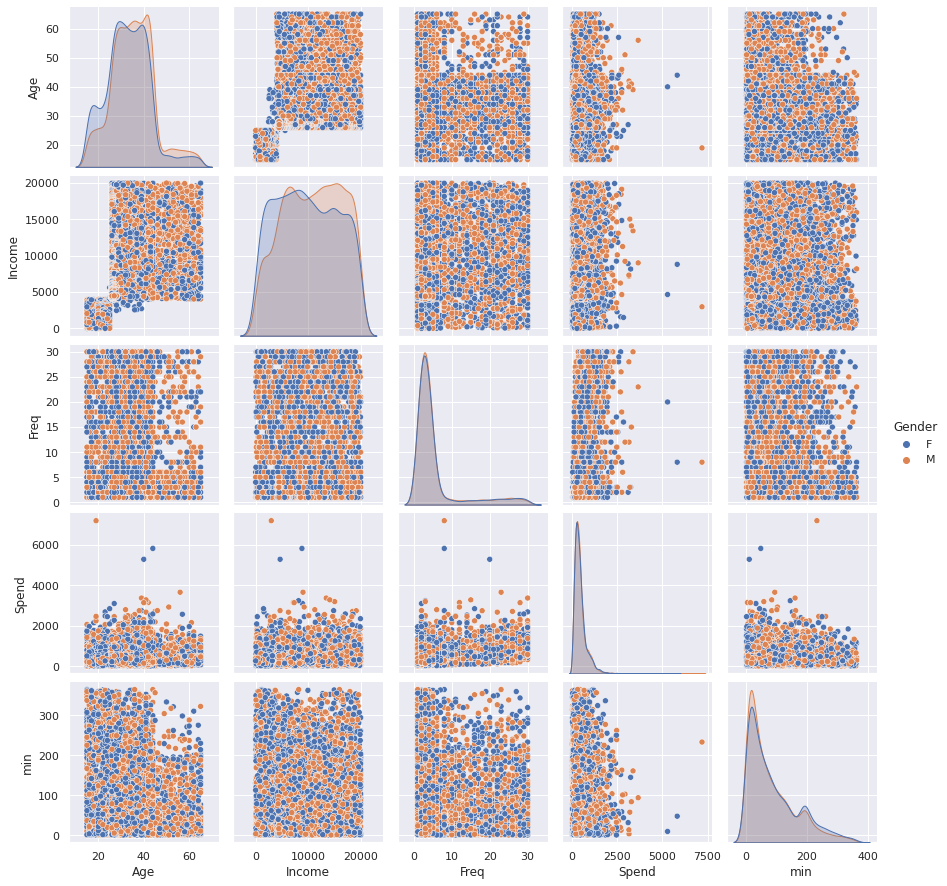

In [33]:
#plotting pairplot
sns.pairplot(data=df_data, hue="Gender")

## (ii) Analysis 

In [34]:
#Creating df_rfm for RFM analysis 
df_rfm = df_data[['CardID','Freq', 'Spend','min']].copy(deep=True)

In [35]:
#Changing dtype of min column to int 
df_rfm['min'] = df_rfm['min'].astype(int) 

#Checking df_rfm head 
df_rfm.head()

,CardID,Freq,Spend,min
0,C0100000199,2,338.00,2
1,C0100000343,5,188.97,115
2,C0100000375,4,408.97,60
3,C0100000482,29,960.18,21
4,C0100000689,2,278.00,5


In [36]:
#Computing Quantile of RFM values 
df_rfm['m_quartile'] = pd.qcut(df_rfm['min'], 4, ['1','2','3','4'])
df_rfm['F_quartile'] = pd.qcut(df_rfm['Freq'], 4, ['4','3','2','1'])
df_rfm['S_quartile'] = pd.qcut(df_rfm['Spend'], 4, ['4','3','2','1']) 

#Checking df_rfm head 
df_rfm.head()

,CardID,Freq,Spend,min,m_quartile,F_quartile,S_quartile
0,C0100000199,2,338.00,2,1,4,3
1,C0100000343,5,188.97,115,3,2,4
2,C0100000375,4,408.97,60,3,2,2
3,C0100000482,29,960.18,21,2,1,1
4,C0100000689,2,278.00,5,1,4,3


In [37]:
#RFM Result Interpretation 
#Combine all three quartiles in a single column 
df_rfm['RFM_Score'] = df_rfm.m_quartile.astype(str)+ df_rfm.F_quartile.astype(str) + df_rfm.S_quartile.astype(str)

#Checking df head 
df_rfm.head() 
 

,CardID,Freq,Spend,min,m_quartile,F_quartile,S_quartile,RFM_Score
0,C0100000199,2,338.00,2,1,4,3,143
1,C0100000343,5,188.97,115,3,2,4,324
2,C0100000375,4,408.97,60,3,2,2,322
3,C0100000482,29,960.18,21,2,1,1,211
4,C0100000689,2,278.00,5,1,4,3,143


In [38]:
# Filter out Top/Best cusotmers & display df_rfm head 
df_rfm[df_rfm['RFM_Score']=='111'].sort_values('Spend', ascending=False).head() 

,CardID,Freq,Spend,min,m_quartile,F_quartile,S_quartile,RFM_Score
726,C0100190309,20,5283.92,10,1,1,1,111
3334,C0101728837,12,3147.98,4,1,1,1,111
7813,C0104096323,28,3139.78,14,1,1,1,111
1919,C0100858779,26,2707.84,13,1,1,1,111
2266,C0101162330,22,2670.76,20,1,1,1,111


In [39]:
#Checking df_data head 
df_data.head()

,CardID,Gender,Age,Income,Freq_enc,Freq,Spend,min
0,C0100000199,F,27,17177,0,2,338.00,2
1,C0100000343,F,28,4646,0,5,188.97,115
2,C0100000375,F,31,3374,0,4,408.97,60
3,C0100000482,M,26,19734,0,29,960.18,21
4,C0100000689,F,28,5717,0,2,278.00,5


We decided not to use RFM scores as a way to determine customer segmentation. 


# 4. K-Means Clustering Model

In [40]:
#Standardize the variables
scaler = StandardScaler() 
scaled_features = scaler.fit_transform(df_data.drop(['CardID', 'Gender','min','Freq_enc'], axis=1))


In [41]:
#Using the Elbow Method for kmeans
kmeans_kwargs = {
   "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

# Create a list to store the SSE values every k value it returns
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

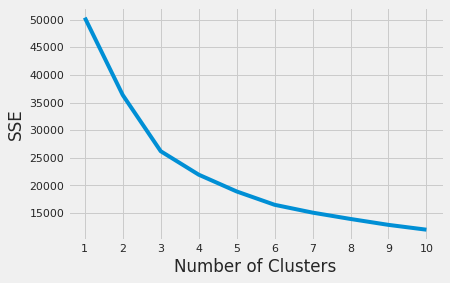

In [42]:
#Plotting elbow curve for kmeans 
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [43]:
#Carrying out KneeLocator for kmeans and finding elbow location 
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing") 

print("Optimal no. of groups is:", kl.elbow)

Optimal no. of groups is: 3


In [44]:
#K-Means for k=3
kmeans_2 = KMeans(n_clusters=3, random_state=0).fit(scaled_features) 

# The lowest SSE value
print("SSE:", kmeans_2.inertia_)  

# Final locations of the centroid
print("Centroid:", kmeans_2.cluster_centers_) 

# The number of iterations required to converge
print( "No. of iterations:", kmeans_2.n_iter_) 

#First 5 predicted labels 
print("First 5 predicted labels:", kmeans_2.labels_[:5]) 

SSE: 26199.872922303057
Centroid: [[ 0.41016472  0.49816025 -0.33655577 -0.22957664]
 [-0.9261045  -1.10445044 -0.322564   -0.20482378]
 [ 0.08952337  0.06452241  2.27944     1.52182898]]
No. of iterations: 14
First 5 predicted labels: [0 1 1 2 1]


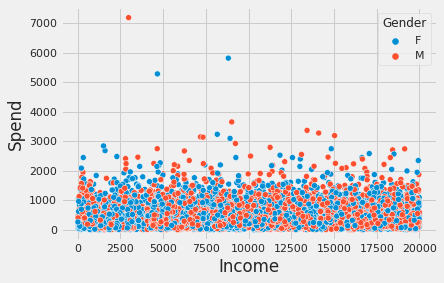

In [45]:
#Plot income vs spend with hue=gender 
sns.scatterplot(data=df_data, x='Income', y='Spend', hue='Gender') 

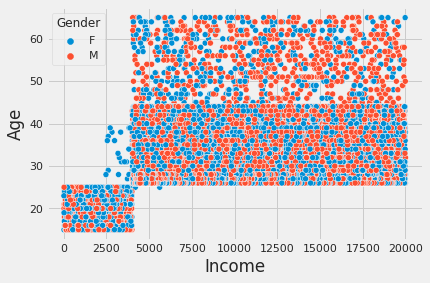

In [46]:
#Plot income vs Age with hue=gender 
sns.scatterplot(data=df_data, x='Income', y='Age', hue='Gender') 

In [47]:
#Check the shape of the df_data
df_data.shape

(12589, 8)

In [48]:
#Adding kmeans labels to df   
df_data['kmeans_labels_2'] = kmeans_2.labels_  

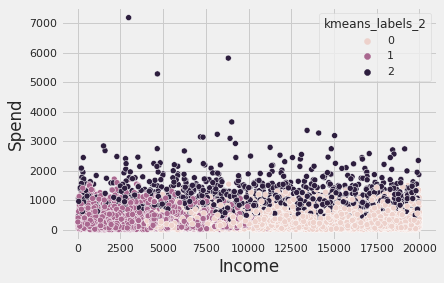

In [49]:
#Plot predicted Income vs Spend for clusters=3, which is the optimal k 
sns.scatterplot(data=df_data, x='Income', y='Spend', hue="kmeans_labels_2") 

The result is not conclusive. 

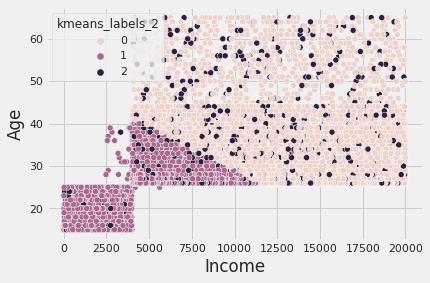

In [50]:
#Plot predicted Income vs Age for clusters=3, which is the optimal k 
sns.scatterplot(data=df_data, x='Income', y='Age', hue="kmeans_labels_2") 

In [51]:
#Making cooy of df_data
df3 = df_data.copy(deep=True)

#df3 = df3.drop(df3[(df3.kmeans_labels_2 == 0) & (df3.kmeans_labels_2 == 2)].index)
df3

,CardID,Gender,Age,Income,Freq_enc,Freq,Spend,min,kmeans_labels_2
0,C0100000199,F,27,17177,0,2,338.00,2,0
1,C0100000343,F,28,4646,0,5,188.97,115,1
2,C0100000375,F,31,3374,0,4,408.97,60,1
3,C0100000482,M,26,19734,0,29,960.18,21,2
4,C0100000689,F,28,5717,0,2,278.00,5,1
...,...,...,...,...,...,...,...,...,...
12584,C0106595162,F,37,18666,0,5,307.96,93,0
12585,C0106596136,M,27,4485,0,3,502.99,6,1
12586,C0106596422,M,42,13178,1,2,458.00,135,0
12587,C0106596502,M,40,4407,0,3,148.98,17,1


In [52]:
df3_0 = df3[df3.kmeans_labels_2 == 0]
df3_1 = df3[df3.kmeans_labels_2 == 1]
df3_2 = df3[df3.kmeans_labels_2 == 2]

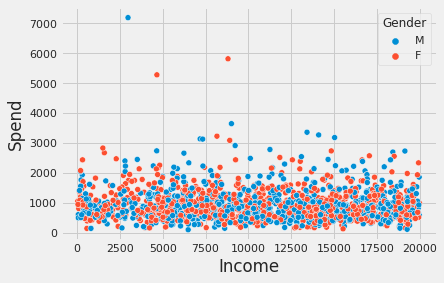

In [53]:
#Plot predicted Income vs Age for clusters=3, which is the optimal k 
sns.scatterplot(data=df3_2, x='Income', y='Spend', hue="Gender") 

In [54]:
#Checking size of genders by kmeans labels 
df3[df3.kmeans_labels_2 == 0].groupby(["Gender"]).size()

Gender
F    3508
M    3999
dtype: int64

In [55]:
#Checking size of genders by kmeans labels 
df3[df3.kmeans_labels_2 == 1].groupby(["Gender"]).size()

Gender
F    1966
M    1518
dtype: int64

In [56]:
#Checking size of genders by kmeans labels 
df3[df3.kmeans_labels_2 == 2].groupby(["Gender"]).size()

Gender
F    813
M    785
dtype: int64

In [57]:
#Exporting data for visualisation, included in slides 
#compression_opts = dict(method='zip', archive_name= 'out.csv')
#df3.to_csv('out.zip', index=False, compression=compression_opts)

# Appendix


Models we have tried that we did not use in the end, are placed in the appendix. 

In [58]:
#Using polynomial features for feature engineering 
#Use Sklearn Polynomial Features
#from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures()
#to_cross = ['Date', 'Amount']
#crossed_feats = poly.fit_transform(df[to_cross].values)

#Convert to Pandas DataFrame and merge to original dataset
#crossed_feats = pd.DataFrame(crossed_feats)
#df_2 = pd.concat([df, crossed_feats], axis=1)

#df_2.head(10).T

In [59]:
#Calling variables 
#X = df_data.drop(['Spend', 'CardID', 'Gender','min','Freq_enc'], axis = 1).copy()
#y = df_data[['Spend']].copy().values.ravel()

#Train/test split 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

#Scaling data 
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)  
 

In [60]:
#from sklearn.neighbors import KNeighborsClassifier 
#Carrying out KNN 
#classifier = KNeighborsClassifier(n_neighbors=3)
#classifier.fit(X_train, y_train)

#Predicting 
#y_pred = classifier.predict(X_test)  

#Classification matrix 
#print(classification_report(y_test, y_pred)) 


#classifier.score_ 

# evaluate accuracy
#print("accuracy: {}".format(accuracy_score(y_test, y_pred))) 





In [61]:
#Cross validation for knn 
# creating odd list of K for KNN
#neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
#cv_scores = []
#from sklearn.model_selection import cross_val_score
# perform 10-fold cross validation
#for k in neighbors:
    #knn = KNeighborsClassifier(n_neighbors=k)
    #scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    #cv_scores.append(scores.mean()) 

In [62]:
# Import SelectKBest from Scikit-learn
#from sklearn.feature_selection import SelectKBest 

#from sklearn.feature_selection import f_classif

#Determining data/target  
#X_5 = df_data.drop(['Income', 'CardID', 'email', 'Gender', 'Location'], axis = 1)
#y_5 = df_data[['Income']].values.ravel()

# Create a SelectKBest object
#skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  #k=2)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
#X_data_new = skb.fit_transform(X_5, y_5)

# Print the results
#print('Number of features before feature selection: {}'.format(X_5.shape[1]))
#print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))




In [63]:
## Print the name of the selected features
# Get columns to keep and create new dataframe with those only
#cols = skb.get_support(indices=True)
#features_df_new = X_5.iloc[:,cols] 
#features_df_new 

#Age and Spend are the most important features based on f-value .

### Model Comparison 


####a. Logistic Regression Model



In [64]:
#Predicting if customer will continue being part of the loyalty programme from their purchase frequency 

#Set predictor and target variables 
#X = df_data.drop(['CardID', 'email', 'Gender', 'Location'], axis = 1)
#y = df_data[['Freq_enc']].values.ravel()

#Scaling data 
#scaler = StandardScaler()  
#scaler.fit(X) 
#scaler.transform(X)

#Splitting dataset of 80:20 train and test respectively
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)  

#Create Logistic Regression Model 
#logreg = LogisticRegression()   

#fitting the model  
#lr_fit = logreg.fit(X_train, y_train) 

# predict test class: 
#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) 

# predicted test probability: 
#logreg.predict_proba(X_test)  

#This accuracy score is rejected as it is definitely the result of overfitting.

In [65]:
#Classification report 
#print(classification_report(y_test, y_pred)) 

In [66]:
#Create confusion matrix 
#cm = confusion_matrix(y_test, y_pred) 
#cm

In [67]:
# Create a heatmap to represent the confusion matrix
#fig, ax = plt.subplots(figsize=(4, 4))
#ax.imshow(cm, cmap = 'Blues')
#ax.grid(False)
#ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
#ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
#ax.set_ylim(1.5, -0.5)
#for i in range(2):
    #for j in range(2):
        #ax.text(j, i, cm[i, j], ha='center', va='center', color='green')
#plt.show()

In [68]:
# SVM Classifier
# Creating scaled set to be used in model to improve the results
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test) 

# Create a Support Vector Classifier
#svc = svm.SVC() 

#Train the model using training sets 
#svc.fit(X_train, y_train) 

#Predicting using test set 
#y_pred = svc.predict(X_test)   

#Calculating accuracy of model 
#print (accuracy_score(y_test, y_pred))

In [69]:
#Gaussian Naive Bayes  
#gnb = GaussianNB()

#Fitting and predicting  
#y_pred = gnb.fit(X_train, y_train).predict(X_test)  

#Predicting using test set 
#y_pred = gnb.predict(X_test)  


#Calculating accuracy of model 
#print (accuracy_score(y_test, y_pred)) 

#The accuracy score is way too perfect (1.0) and it's not realistically possible. We are rejecting it, 
#and carrying out PCA to find out the optimum number of groups that we should be splitting Frequency into, instead of 2 groups.


In [70]:
#Carrying out PCA 
# Create a PCA instance: pca
#pca = PCA()
#principalComponents = pca.fit_transform(X_train)

# Plot the explained variances
#features = range(pca.n_components_)
#plt.bar(features, pca.explained_variance_ratio_, color='blue')
#plt.xlabel('PCA features')
#plt.ylabel('variance %')
#plt.xticks(features)

In [71]:
#Carrying out k-means 
#Elbow Method for kmeans
#kmeans_kwargs = {
   #"init": "random",
    #"n_init": 10,
    #"max_iter": 300,
    #"random_state": 42,
    #}

# A list holds the SSE values for each k
#sse = []
#for k in range(1, 31):
    #kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    #kmeans.fit(X_train)
    #sse.append(kmeans.inertia_)

In [72]:
#Plotting elbow curve for kmeans 
#plt.style.use("fivethirtyeight")
#plt.plot(range(1, 31), sse)
#plt.xticks(range(1, 31))
#plt.xlabel("Number of Clusters")
#plt.ylabel("SSE")
#plt.show()

In [73]:
#Carrying out KneeLocator for kmeans and finding elbow location 
#kl = KneeLocator(
    #range(1, 31), sse, curve="convex", direction="decreasing" 
#) 

#print("Optimal no. of groups is:", kl.elbow)

In [74]:
#Splitting CardID into 2 groups: High frequency, low frequency. 
#Splitting CardID
#bins = [1, 5, 10, 15, 20, 24, 27, 30]
#labels = ['1', '2', '3', '4', '5', '6', '7'] 
#cardID_value1 = pd.cut(cardID_value_1, bins, labels = labels,include_lowest = True)

#Check CardID_value 
#print(cardID_value1)

In [75]:
#Adding CardID_value_1 to df_data 
#Calling values to freq_enc
#freq_enc_opt = cardID_value1.values 

#Adding column to df_data  
#df_data['Freq_enc_opt']  = freq_enc_opt  

#Check df_data head 
#df_data.head()

In [76]:
#number of clusters
#K=7

# Select random observation as centroids
#Centroids = (df_data.sample(n=K))
#plt.scatter(df_data["Freq"],df_data["Spend"],c='black')
#plt.scatter(Centroids["Freq"],Centroids["Spend"],c='red')
#plt.xlabel('Frequency')
#plt.ylabel('Spend')
#plt.show() 

In [77]:
#color=['red', 'yellow', 'orange', 'blue','green','cyan', 'purple']
#for k in range(K):
	    #data=df_data[df_data["Cluster"]==k+1]
	    #plt.scatter(data["Freq"],data["Spend"],c=color[k])
#plt.scatter(Centroids["Freq"],Centroids["Spend"],c='black')
#plt.xlabel('Frequency')
#plt.ylabel('Amount Spent per Annum')
#plt.show()

In [78]:
#convert spend to int 
#df_data.Spend = df_data.Spend.astype(int) 
#df_data.dtypes

In [79]:
#Logistic Regression using spend 

#Set predictor and target variables 
#X1 = df_data.drop(['CardID', 'email', 'Gender', 'Location'], axis = 1)
#y1 = df_data[['Spend']].values.ravel()

#Scaling data 
#scaler = StandardScaler()  
#scaler.fit(X1) 
##scaler.transform(X1)

#Splitting dataset by 80:20 of train and test respectively 
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state = 0)  

#fitting to the Logistic Regression model  
#lr_fit1 = logreg.fit(X1_train, y1_train) 

# predict test class: 
#y_pred1 = logreg.predict(X1_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test))) 

# predicted test probability: 
#logreg.predict_proba(X1_test)  

In [80]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

#diff = 1
#j=0

#while(diff!=0):
    #XD=df_data
    #i=1
    #for index1,row_c in Centroids.iterrows():
        #ED=[]
        #for index2,row_d in XD.iterrows():
            #d1=(row_c["Freq"]-row_d["Freq"])**2
            #d2=(row_c["Spend"]-row_d["Spend"])**2
            #d=np.sqrt(d1+d2)
            #ED.append(d)
        #df_data[i]=ED
        #i=i+1

    #C=[]
    #for index,row in df_data.iterrows():
        #min_dist=row[1]
        #pos=1
        #for i in range(K):
            #if row[i+1] < min_dist:
                #min_dist = row[i+1]
                #pos=i+1
        #C.append(pos)
    #df_data["Cluster"]=C
    #Centroids_new = df_data.groupby(["Cluster"]).mean()[["Freq","Spend"]]
    #if j == 0:
        #diff=1
        #j=j+1
    #else:
        #diff = (Centroids_new['Spend'] - Centroids['Spend']).sum() + (Centroids_new['Freq'] - Centroids['Spend']).sum()
        #print(diff.sum())
    #Centroids = df_data.groupby(["Cluster"]).mean()[["Spend","Freq"]]